In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10001-coc-players-details/8.jpg
/kaggle/input/10001-coc-players-details/10001 Clash of Clans Players Details.csv
/kaggle/input/10001-coc-players-details/1.png
/kaggle/input/10001-coc-players-details/2.png
/kaggle/input/10001-coc-players-details/7.png
/kaggle/input/10001-coc-players-details/5.png
/kaggle/input/10001-coc-players-details/3.png
/kaggle/input/10001-coc-players-details/8.png
/kaggle/input/10001-coc-players-details/6.png
/kaggle/input/10001-coc-players-details/Clan and Player tags.csv


**Clash of Clans:** Clash of Clans is a popular mobile strategy game developed and published by Finnish game developer Supercell. Launched in 2012, it allows players to build their own villages, form clans with other players, and engage in clan wars. Players defend their villages with various troops, spells, and defenses, while attacking others to earn resources.

# How to download players data

To access data from the Clash of Clans API, first register an account on the Clash of Clans Developers site. Following login, the next step involves creating an API key. This key allows for the retrieval of game data, facilitating the development of applications or analysis based on the game's information.

:: Millions of players are registered on Clash of Clans (COC), but there is no direct API to fetch all player tags (IDs).
:: To work around this, the process is divided into steps.
:: Initially, an API is used to obtain a list of clan tags, applying specific criteria.
:: Subsequently, member tags are extracted from each clan's information.
:: Clans consist of 1 to 50 members.
:: By acquiring 1000 clan tags and assuming an average of 25 members per clan,
:: It's estimated to yield 25,000 player tags.

We will get json file to download.

From the downloaded file we have to extract clan tags.

In [2]:
## Code to extract clan tags
# import json

## File path
# file_path = 'clans.json'

## Function to open the file and extract tags, specifying the encoding
# def extract_tags_from_file(file_path):
#    with open(file_path, 'r', encoding='utf-8') as file:  # Specifying the encoding here
#        data = json.load(file)
#        return [item.get("tag") for item in data.get("items", [])]

## Extract tags from the specified file
# try:
#    extracted_tags = extract_tags_from_file(file_path)
#    print(extracted_tags)
# except UnicodeDecodeError as e:
#    print(f"Error reading the file: {e}")

The extracted clan tags have '#' in beigning we have to replace it with URL encode '%23'

In [3]:
## Code
# def update_tags(extracted_tags):
    ## Replace '#' with '%23' for each tag in the list
#    updated_tags = [tag.replace('#', '%23') for tag in extracted_tags]
#    return updated_tags

## Get the updated list of tags
# updated_extracted_tags = update_tags(extracted_tags)

## Print or return the updated list
# print(updated_extracted_tags)


From the extracted clan tags, next step is to extract players tags

In [4]:
# import requests

## Your API key
# api_key = 'c'  # Replace API_KEY

## Base URL for the Clash of Clans API clans endpoint
# base_url = 'https://api.clashofclans.com/v1/clans/'

## Header to include in the request
# headers = {
#    'Authorization': f'Bearer {api_key}',
#    'Accept': 'application/json'
# }

## Function to get clan member list for each clan tag
# def get_clan_members(clan_tags):
#    clan_members = {}  # Dictionary to store clan members list by clan tag
#    for tag in clan_tags:
## Constructing the full URL for the clan members endpoint
#        full_url = f'{base_url}{tag}/members'
#        response = requests.get(full_url, headers=headers)
#        if response.status_code == 200:
## Successful response
#            data = response.json()
#            # Assuming the API returns a list of clan members directly
#            clan_members[tag] = data.get('items', [])
#       else:
## Handle errors or unsuccessful responses
#            print(f'Failed to fetch clan members for {tag}: HTTP {response.status_code}')
#    return clan_members

## Get clan members for each tag
# clan_members_lists = get_clan_members(updated_extracted_tags)

## Example: print the result for the first clan
# first_tag = updated_extracted_tags[0]
# print(f'Clan members for {first_tag}:', clan_members_lists[first_tag])


In [5]:
## Assuming clan_members_lists is your dictionary from the modified get_clan_members function
# def convert_to_dataframe(clan_members_lists):
## Create a list of tuples (clan_tag, player_tag) for all clans
#    data = [(clan_tag, player_tag) for clan_tag, player_tags in clan_members_lists.items() for player_tag in player_tags]
    
## Convert the list of tuples into a DataFrame
# df = pd.DataFrame(data, columns=['Clan Tag', 'Player Tag'])
    
# return df

## Convert the dictionary to a DataFrame
# df_clan_members = convert_to_dataframe(clan_members_lists)
# print(df_clan_members)

In [6]:
# def convert_to_dataframe(clan_members_lists):
## Initialize an empty list to store the data
#    data = []
    
## Loop through each clan tag and its corresponding list of members
#    for clan_tag, members in clan_members_lists.items():
#        for member in members:
## For each member, extract the clan tag and the player tag, ensuring the player tag is a string
#            player_tag = member['tag']  # Assuming 'tag' key exists and its value is the player's tag
#            data.append((clan_tag, player_tag))
    
## Convert the list of tuples into a DataFrame
#    df = pd.DataFrame(data, columns=['Clan Tag', 'Player Tag'])
    
## Optional: Convert clan and player tags to ensure they are URL-friendly
## This step is optional and depends on whether you need to use these tags in URLs
#    df['Clan Tag'] = df['Clan Tag'].apply(lambda x: x.replace('#', '%23'))
#    df['Player Tag'] = df['Player Tag'].apply(lambda x: x.replace('#', '%23'))
    
#    return df

## Example usage with your clan_members_lists dictionary
## Make sure to replace 'clan_members_lists' with your actual dictionary variable
# df_clan_members = convert_to_dataframe(clan_members_lists)
# print(df_clan_members)
# df_clan_members.to_csv('Clan and Player tag')

From the extracted players tag we have to get player information

We have to get data of 500 players in 1 execution of code because site limit is 500 details per hit So we will run the below code 20 times and merge the downloaded csv files.
And create dataset of 10001 players.

In [7]:
## Code
# import pandas as pd
# import requests
# import time

## Load the CSV file into a DataFrame
# df = pd.read_csv('Clan and Player tags.csv')  # Update this path to your actual CSV file location
## Keep only the first 500 rows (tags)
# df = df.iloc[:500]

## API details
# api_key = 'v'
# headers = {'Authorization': 'Bearer ' + api_key}

# Function to fetch player details
# def fetch_player_details(tag):
#    url = f'https://api.clashofclans.com/v1/players/{tag.replace("#", "%23")}'  # Ensure tags are properly URL encoded
#    response = requests.get(url, headers=headers)
#    if response.status_code == 200:
#        data = response.json()
#        return {
#            'league': data.get('league', {}).get('name', ''),
#            'builderBaseLeague': data.get('builderBaseLeague', {}).get('name', ''),
#            'role': data.get('role', ''),
#            'attackWins': data.get('attackWins', 0),
#            'defenseWins': data.get('defenseWins', 0),
#            'townHallLevel': data.get('townHallLevel', 0),
#            'name': data.get('name', ''),
#            'expLevel': data.get('expLevel', 0),
#            'trophies': data.get('trophies', 0),
#            'bestTrophies': data.get('bestTrophies', 0),
#            'donations': data.get('donations', 0),
#            'donationsReceived': data.get('donationsReceived', 0),
#            'builderHallLevel': data.get('builderHallLevel', 0),
#            'builderBaseTrophies': data.get('builderBaseTrophies', 0),
#            'bestBuilderBaseTrophies': data.get('bestBuilderBaseTrophies', 0),
#            'warStars': data.get('warStars', 0),
#            'clanCapitalContributions': data.get('clanCapitalContributions', 0),
#        }
#    else:
#        print(f'Failed to fetch data for {tag}: HTTP {response.status_code} - {response.text}')
#        return {}

# player_details = []
# for index, row in df.iterrows():
#    tag = row['Tag']  # Replace 'Tag' with the actual column name in your CSV that contains the player tags
#    details = fetch_player_details(tag)
#    if details:  # Ensure details were fetched successfully
#        player_details.append(details)
    
## Add a delay between each request to avoid hitting API rate limits
#    time.sleep(0.2)  # Adjust the delay as necessary based on the API's rate limit policy

## Create a new DataFrame with the player details
# details_df = pd.DataFrame(player_details)

## Merge the original DataFrame with the new details DataFrame
# final_df = pd.concat([df, details_df], axis=1)

## Save the final DataFrame to a new CSV file
# final_df.to_csv('Clan_and_Player_Details_500.csv', index=False)


Now we have dataset of 10001 players

# Import Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/10001-coc-players-details/10001 Clash of Clans Players Details.csv')
df.head()

Clan Tag           Tag          league    builderBaseLeague      role  \
0  %23UQ0PVPU2  %239RRRPCRG0   Legend League  Platinum League III  coLeader   
1  %23UQ0PVPU2   %2390QJPJYV   Legend League   Platinum League II    leader   
2  %23UQ0PVPU2  %23LJRPCJVUV  Titan League I  Platinum League III  coLeader   
3  %23UQ0PVPU2   %239R99CUQP   Legend League  Titanium League III     admin   
4  %23UQ0PVPU2  %23YCQYJY0QG  Titan League I   Titanium League II     admin   

   attackWins  defenseWins  townHallLevel       name  expLevel  trophies  \
0          31            3             16       Baas       234      5021   
1          61            2             16   ⚡Zartek⚡       249      5255   
2          23            2             16       Leev       227      4963   
3          29            1             13   heineken       203      4968   
4          21            3             14  ♠️JAKES♥️       211      4922   

   bestTrophies  donations  donationsReceived  builderHallLevel  \
0          5594        366               1375                10   
1          5623       1185               1399                10   
2          5336        645               1954                10   
3          5017        428                124                 9   
4          5316        782                288                 9   

   builderBaseTrophies  bestBuilderBaseTrophies  warStars  \
0                 4519                     5119      1152   
1                 4658                     4960      1403   
2                 4514                     4667      1405   
3                 3827                     4028       792   
4                 4021                     4301       761   

   clanCapitalContributions  
0                    909290  
1                   3638598  
2                    957100  
3                   1126868  
4                   1643744

We will explore the data now

# Understanding data

In [9]:
df.sample(5)

Clan Tag           Tag              league builderBaseLeague  \
6332   %232RCLGJ2J  %239Q2V0UPRU            Unranked    Stone League I   
9682  %232Q8882QYU  %23QVYLGPGJ2            Unranked    Wood League IV   
2881   %232PY0YJ9G   %23YVGV8YQY   Crystal League II   Brass League II   
1195   %23JJQRV89V  %23LJCVVG99J  Crystal League III    Wood League II   
1209  %232QCCPPYQ2  %232V8GYYP0G            Unranked    Brass League I   

          role  attackWins  defenseWins  townHallLevel           name  \
6332    member           0            0              8   Semut_Ranggi   
9682    member           0            0              7   sajan tamang   
2881     admin           1            0             11  I T ∆ © H ¡ ™   
1195  coLeader           0            0             12        Malcolm   
1209  coLeader           0            0             13         FRAZER   

      expLevel  trophies  bestTrophies  donations  donationsReceived  \
6332        68       997          1571          0                  0   
9682        32       670           780          0                  0   
2881       174      2269          3574        124                637   
1195       129      2187          2611          0                 72   
1209       164      2245          3445          0                  0   

      builderHallLevel  builderBaseTrophies  bestBuilderBaseTrophies  \
6332                 4                 1400                     1490   
9682                 3                  192                      196   
2881                 7                 2277                     3023   
1195                 4                  367                      367   
1209                 8                 2540                     2755   

      warStars  clanCapitalContributions  
6332        66                         0  
9682         0                         0  
2881      1343                     19595  
1195       409                     57250  
1209       892                    212607

In [10]:
df.tail()

Clan Tag           Tag               league  builderBaseLeague  \
9996   %232QYQU080U  %23QJLRLVJQG  Champion League III   Copper League II   
9997   %232QYQU080U  %23QVCJY2YQG     Crystal League I    Brass League II   
9998   %232QYQU080U  %23G02RRCGJ2     Crystal League I   Brass League III   
9999   %232QYQU080U  %23QV2RL0RYG   Crystal League III    Copper League V   
10000  %232QYQU080U  %23G2QGY8P9P   Crystal League III  Copper League III   

           role  attackWins  defenseWins  townHallLevel        name  expLevel  \
9996      admin          16            1             13        koko       133   
9997     leader           1            0             12  hh noskill       124   
9998   coLeader           1            1             12        nope       112   
9999   coLeader           2            0             11        nice       102   
10000  coLeader           2            3             11          阿华        91   

       trophies  bestTrophies  donations  donationsReceived  builderHallLevel  \
9996       3143          3224        104                  4                 6   
9997       2584          3018         77                  0                 7   
9998       2436          2537         38                  0                 6   
9999       2198          2435          0                  0                 5   
10000      2149          2411         42                  0                 5   

       builderBaseTrophies  bestBuilderBaseTrophies  warStars  \
9996                  1811                     1811       316   
9997                  2333                     2371       604   
9998                  2037                     2087       612   
9999                  1590                     1796       511   
10000                 1702                     1735       397   

       clanCapitalContributions  
9996                      33416  
9997                     289987  
9998                     273542  
9999                     218977  
10000                    195951

In [11]:
df.shape

(10001, 19)

In [12]:
df.columns

Index(['Clan Tag', 'Tag', 'league', 'builderBaseLeague', 'role', 'attackWins',
       'defenseWins', 'townHallLevel', 'name', 'expLevel', 'trophies',
       'bestTrophies', 'donations', 'donationsReceived', 'builderHallLevel',
       'builderBaseTrophies', 'bestBuilderBaseTrophies', 'warStars',
       'clanCapitalContributions'],
      dtype='object')

In [13]:
print(df.describe())
# df.describe().round(3).T

# Describe the 'role' and 'league' columns
df['role'] = df['role'].astype('category')
df['league'] = df['league'].astype('category')

# Now, instead of using 'include' parameter with column names, 
# directly select the 'role' and 'league' columns and then call describe().
description = df.describe(include = ['object', 'bool', 'category']).T
print(description)

         attackWins   defenseWins  townHallLevel      expLevel      trophies  \
count  10001.000000  10001.000000   10001.000000  10001.000000  10001.000000   
mean       3.775022      0.473553      10.839816    114.571943   1929.738026   
std        9.656417      1.276450       2.782110     59.209511   1054.292095   
min        0.000000      0.000000       2.000000      3.000000      0.000000   
25%        0.000000      0.000000       9.000000     69.000000   1108.000000   
50%        0.000000      0.000000      11.000000    112.000000   1813.000000   
75%        2.000000      0.000000      13.000000    155.000000   2516.000000   
max      200.000000     24.000000      16.000000    285.000000   5358.000000   

       bestTrophies     donations  donationsReceived  builderHallLevel  \
count  10001.000000  10001.000000       10001.000000      10001.000000   
mean    2484.735026    125.135886         125.026397          6.155284   
std     1315.837718    536.886609         410.065176     

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Clan Tag                  10001 non-null  object  
 1   Tag                       10001 non-null  object  
 2   league                    10001 non-null  category
 3   builderBaseLeague         9684 non-null   object  
 4   role                      9988 non-null   category
 5   attackWins                10001 non-null  int64   
 6   defenseWins               10001 non-null  int64   
 7   townHallLevel             10001 non-null  int64   
 8   name                      10001 non-null  object  
 9   expLevel                  10001 non-null  int64   
 10  trophies                  10001 non-null  int64   
 11  bestTrophies              10001 non-null  int64   
 12  donations                 10001 non-null  int64   
 13  donationsReceived         10001 non-null  int6

Data types are correct

In [15]:
# Check for null values
df.isna().sum()

# Check for any null value in the DataFrame
# has_null = df.isnull().any().any()
# print(has_null)

Clan Tag                      0
Tag                           0
league                        0
builderBaseLeague           317
role                         13
attackWins                    0
defenseWins                   0
townHallLevel                 0
name                          0
expLevel                      0
trophies                      0
bestTrophies                  0
donations                     0
donationsReceived             0
builderHallLevel              0
builderBaseTrophies           0
bestBuilderBaseTrophies       0
warStars                      0
clanCapitalContributions      0
dtype: int64

In [16]:
df['league'].unique() # Understanding columns

['Legend League', 'Titan League I', 'Titan League II', 'Titan League III', 'Champion League I', ..., 'Silver League III', 'Silver League I', 'Bronze League I', 'Bronze League III', 'Bronze League II']
Length: 23
Categories (23, object): ['Bronze League I', 'Bronze League II', 'Bronze League III', 'Champion League I', ..., 'Titan League I', 'Titan League II', 'Titan League III', 'Unranked']

In [17]:
df['builderBaseLeague'].nunique()

36

In [18]:
df['builderBaseLeague'].value_counts()

builderBaseLeague
Brass League II        871
Brass League III       791
Brass League I         761
Iron League III        584
Iron League II         430
Copper League I        418
Copper League IV       375
Copper League II       369
Iron League I          363
Copper League III      358
Wood League V          338
Copper League V        305
Stone League I         253
Steel League III       252
Stone League III       222
Stone League II        222
Steel League II        198
Wood League IV         194
Steel League I         191
Stone League IV        185
Wood League III        181
Wood League II         179
Wood League I          171
Stone League V         167
Clay League I          166
Clay League IV         158
Clay League V          147
Titanium League III    141
Clay League II         141
Clay League III        140
Titanium League II     137
Titanium League I       95
Platinum League III     65
Platinum League II      62
Platinum League I       42
Emerald League III      12
Name: coun

# Treating missing values

In [19]:
# Remove rows that contain any null values
# df = df.dropna()

# Drop Columns with Null Values
# df_dropped_columns = df.dropna(axis=1)

# Remove rows with missing values in role
df.dropna(subset=['role'], inplace=True)  

# Replace missing values with Unranked
df['builderBaseLeague'].fillna(value='Unranked', inplace=True)  

# Fill Null Values with Forward Fill (ffill)
# df_ffill = df.fillna(method='ffill')

# Fill Null Values with Backward Fill (bfill)
# df_bfill = df.fillna(method='bfill')

# Fill with mean
# df = df.fillna(df.mean())

# Fill with median
# df = df.fillna(df.median())

# Fill with mode (note: mode().iloc[0] is used because mode() returns a DataFrame)
# df = df.fillna(df.mode().iloc[0])

# Using a Calculated Value (Other than Mean, Median, Mode)
# df = df['column'].fillna(value=df['column'].max())

# Interpolation
# df_interpolated = df.interpolate(method='linear')
# df_interpolated = df.interpolate(method='time')

# from sklearn.impute import SimpleImputer

# Creating an imputer object to fill missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# Fitting the imputer on your data and transforming the data
# df_filled = imputer.fit_transform(df)

# For median
# imputer_median = SimpleImputer(strategy='median')

# For mode (most frequent)
# imputer_mode = SimpleImputer(strategy='most_frequent')

# Models can be used to predict the missig values based on other columns
# from sklearn.tree import DecisionTreeRegressor  # or DecisionTreeClassifier for categorical targets

# Split the data
# not_null_df = df[df['target'].notna()]
# null_df = df[df['target'].isna()]

# Define features (columns used to predict 'target')
# features = ['feature1', 'feature2', 'feature3']  # Update this list with your actual feature names

# Train the model
# model = DecisionTreeRegressor()  # Use DecisionTreeClassifier if 'target' is categorical
# model.fit(not_null_df[features], not_null_df['target'])

# Predict and fill missing values
# predicted_values = model.predict(null_df[features])
# df.loc[df['target'].isna(), 'target'] = predicted_values


# Linear Regression Model

# from sklearn.linear_model import LinearRegression

# Split the data based on null values in 'target'
# not_null_df = df[df['target'].notna()]
# null_df = df[df['target'].isna()]

# Define features
# features = ['feature1', 'feature2', 'feature3']  # Adjust to your dataset's features

# Train the Linear Regression model
# model = LinearRegression()
# model.fit(not_null_df[features], not_null_df['target'])

# Predict missing values
# predicted_values = model.predict(null_df[features])

# Fill missing values in the original DataFrame
# df.loc[df['target'].isna(), 'target'] = predicted_values



In [20]:
df.shape

(9988, 19)

# Treating duplicate values

In [21]:
# Remove duplicates across all columns, keeping the first occurrence
df = df.drop_duplicates()

# Remove duplicates based on specific columns, keeping the last occurrence
# df_unique_in_columns = df.drop_duplicates(subset=['Column1', 'Column2'], keep='last')

# Remove all duplicates (neither first nor last occurrence is kept)
# df_unique_no_duplicates = df.drop_duplicates(keep=False)

df.shape

(9988, 19)

#  Treating Outlier

In [22]:
# 1. Removing outliers

# Q1 = df['column'].quantile(0.25)
# Q3 = df['column'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
# filtered_df = df[(df['column'] >= lower_bound) & (df['column'] <= upper_bound)]

# 2. Modifying outliers

# from scipy.stats.mstats import winsorize

# Winsorize the data
# winsorized_data = winsorize(df['column'], limits=[0.05, 0.05])

# Convert back to a DataFrame, if necessary
# df['column'] = winsorized_data

# Transformation

# Log transformation
# df['log_column'] = np.log(df['column'] + 1)  # Adding 1 to avoid log(0)

# Square root transformation
# df['sqrt_column'] = np.sqrt(df['column'])

# Box-Cox transformation
# from scipy.stats import boxcox

# Note: Box-Cox requires all data to be positive
# df['column'], fitted_lambda = boxcox(df['column'] + 1)  # Adding 1 to shift all values positive

# Imputation
# median = df.loc[(df['column'] >= lower_bound) & (df['column'] <= upper_bound), 'column'].median()
# df.loc[(df['column'] < lower_bound) | (df['column'] > upper_bound), 'column'] = median


In [23]:
# Making seperate dataframes

# Separate categorical columns automatically
categorical_cols = df.select_dtypes(include=['object']).columns
df_categorical = df[categorical_cols]

# Separate continuous columns automatically
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_continuous = df[continuous_cols]

# Creating Plots to understand data

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

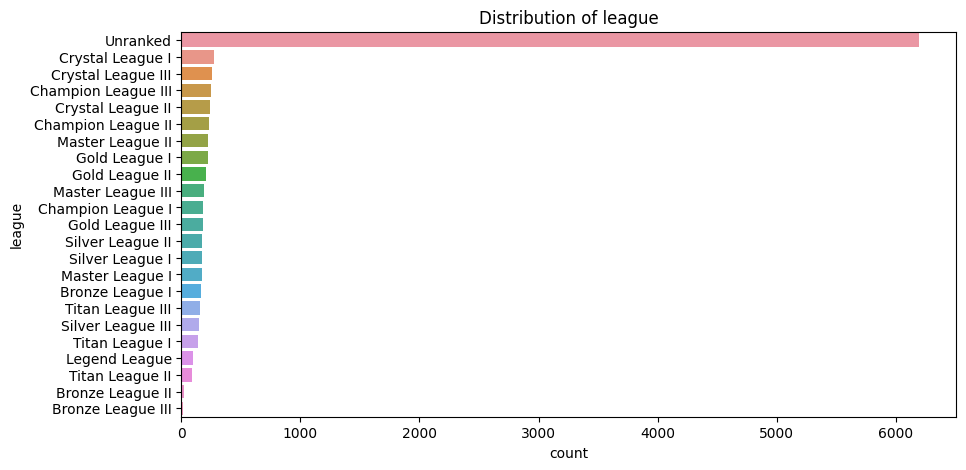

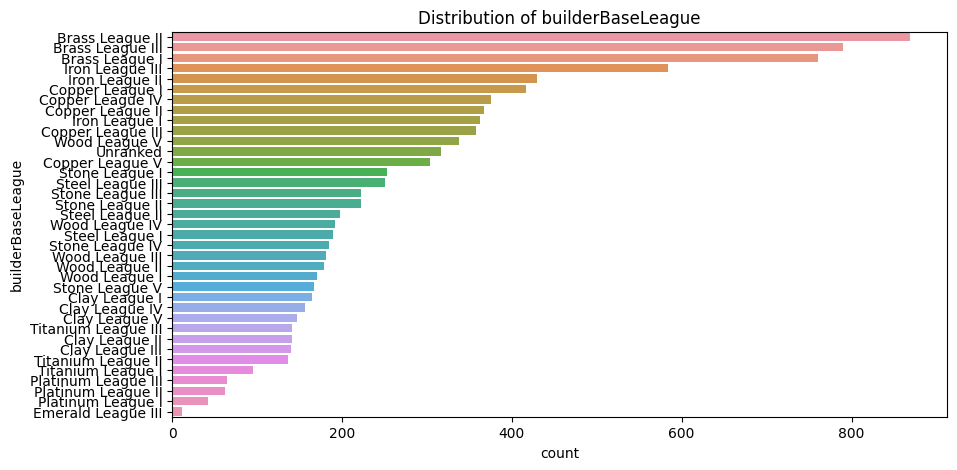

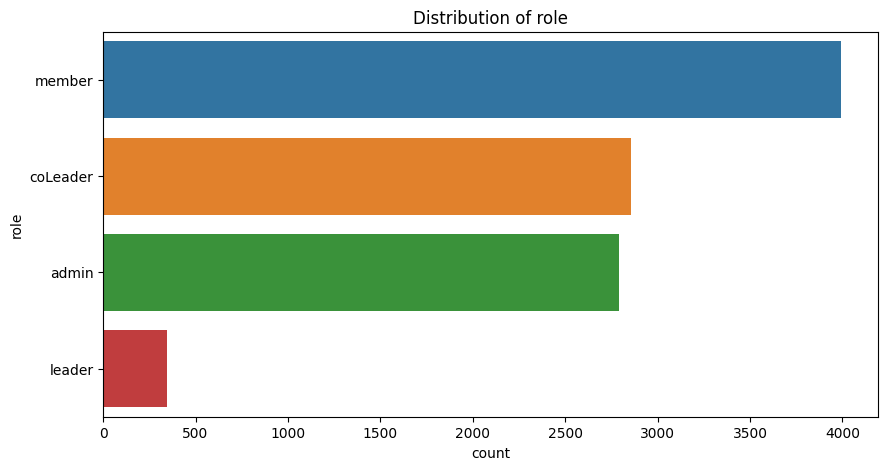

In [25]:
for column in ['league', 'builderBaseLeague', 'role']:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column], order = df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.show()

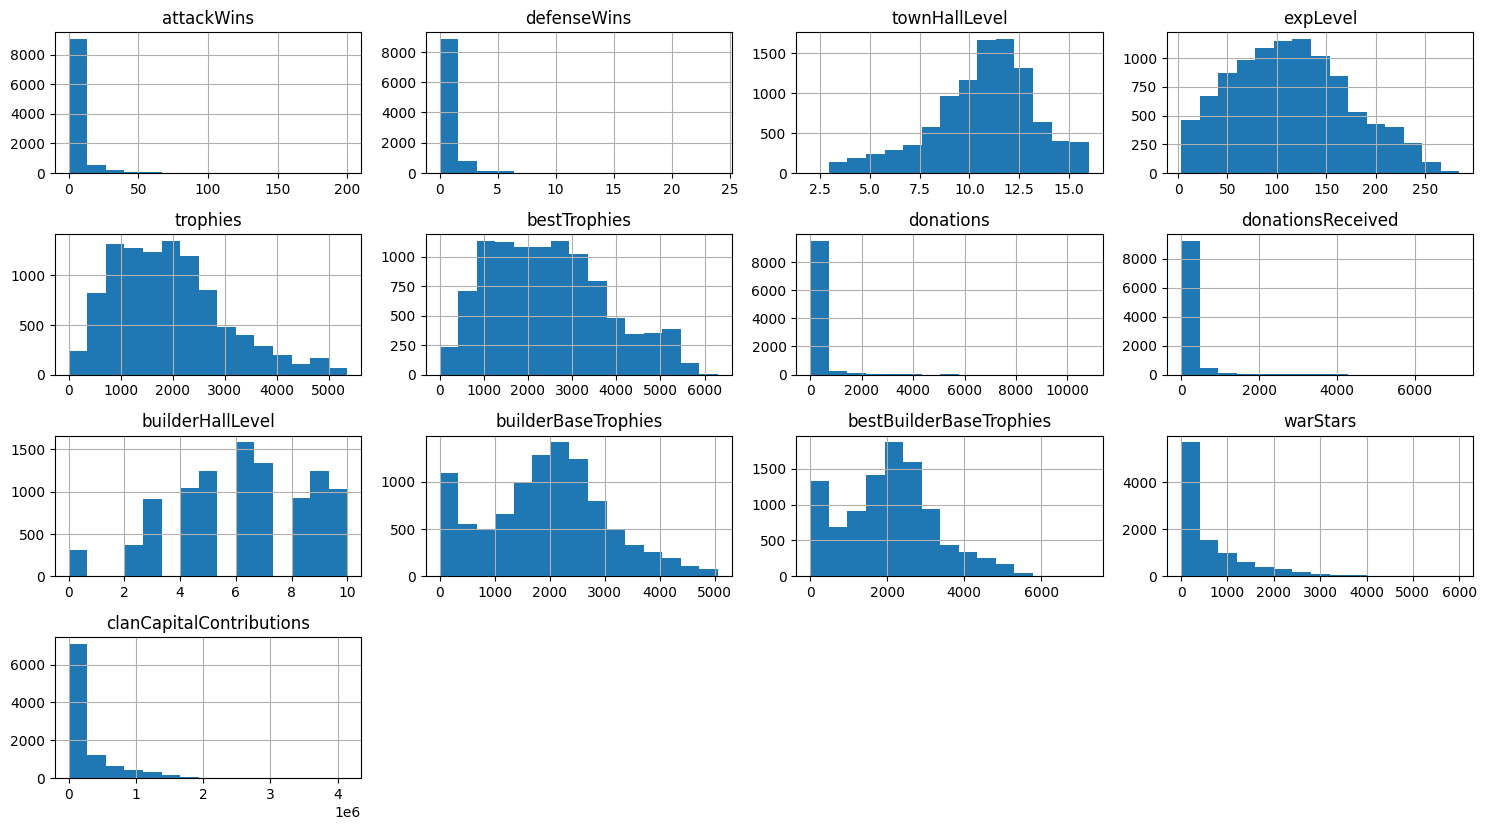

In [26]:
# Histograms for numerical columns
df.hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

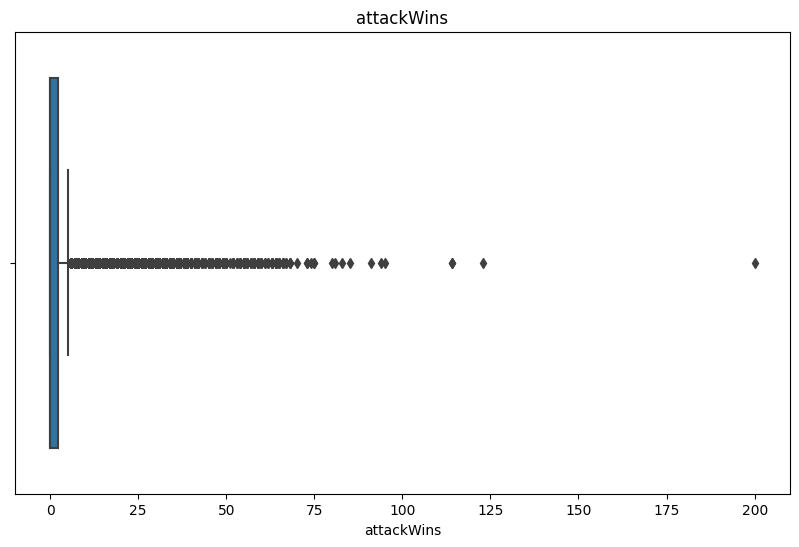

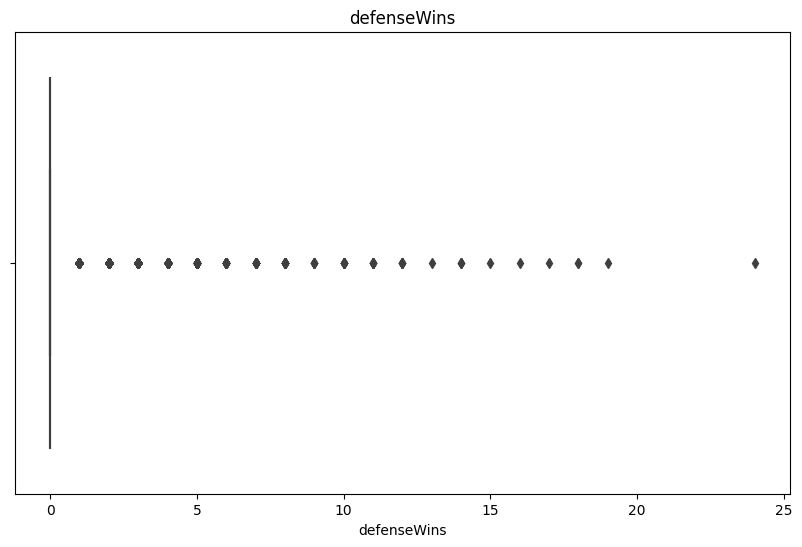

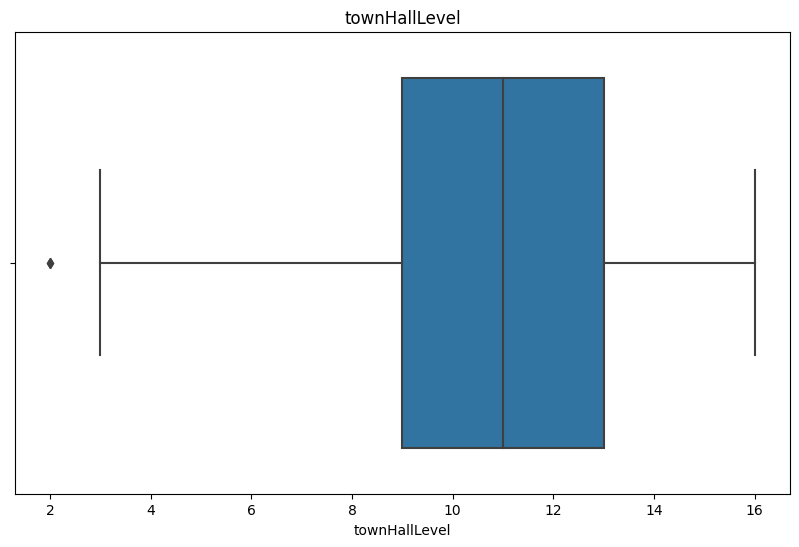

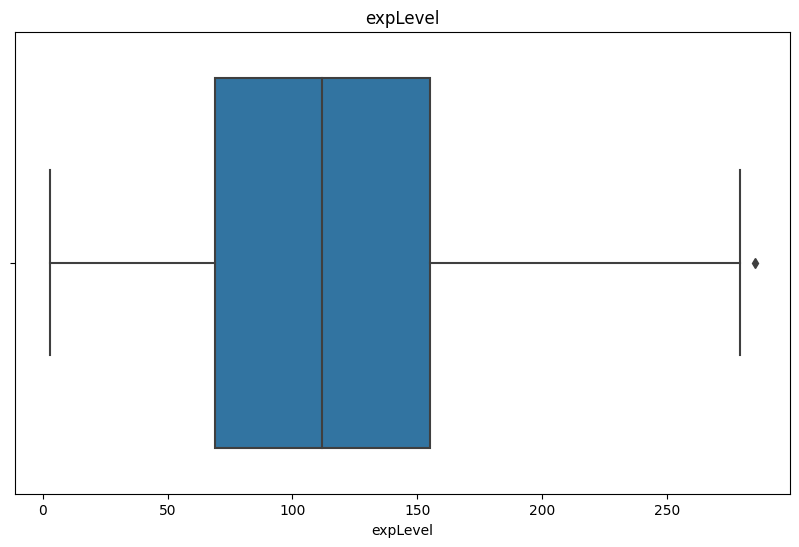

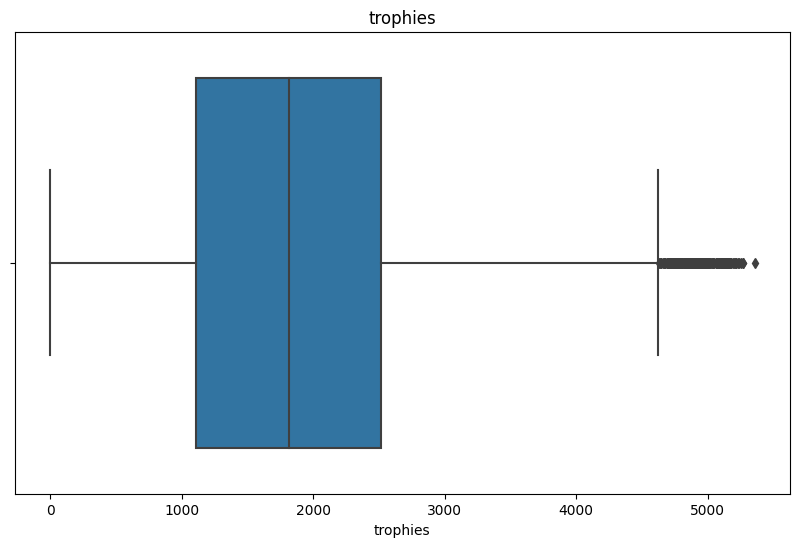

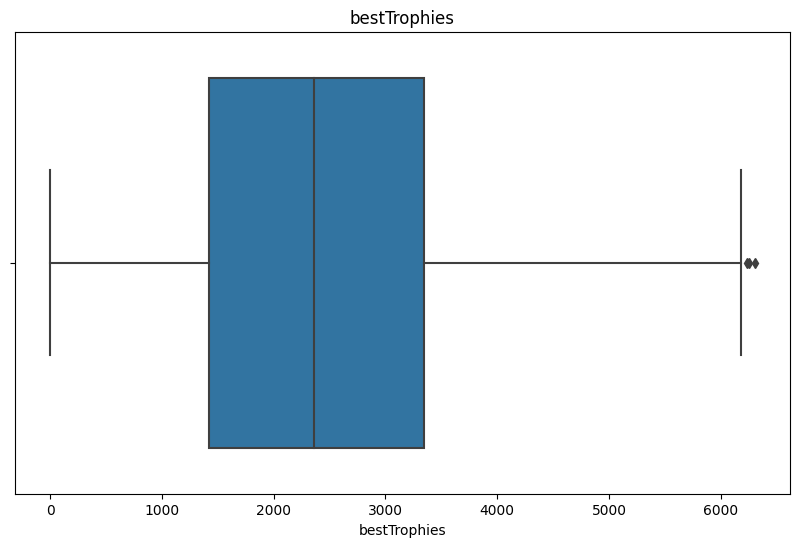

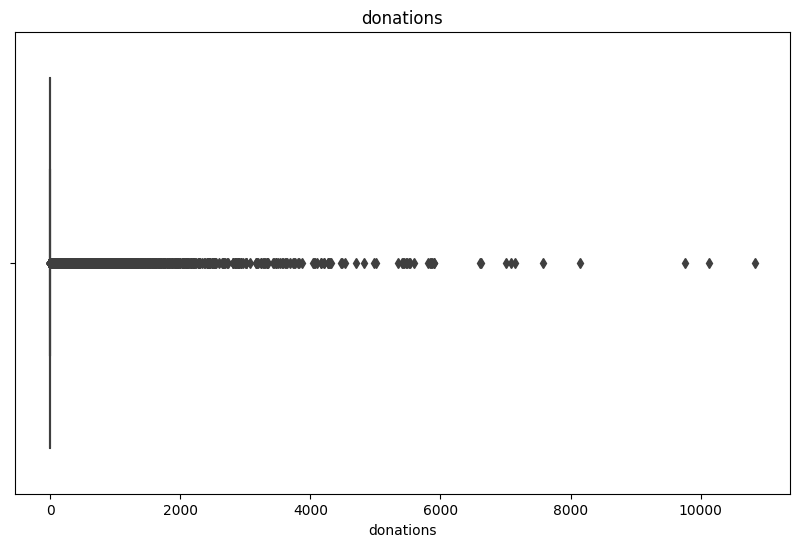

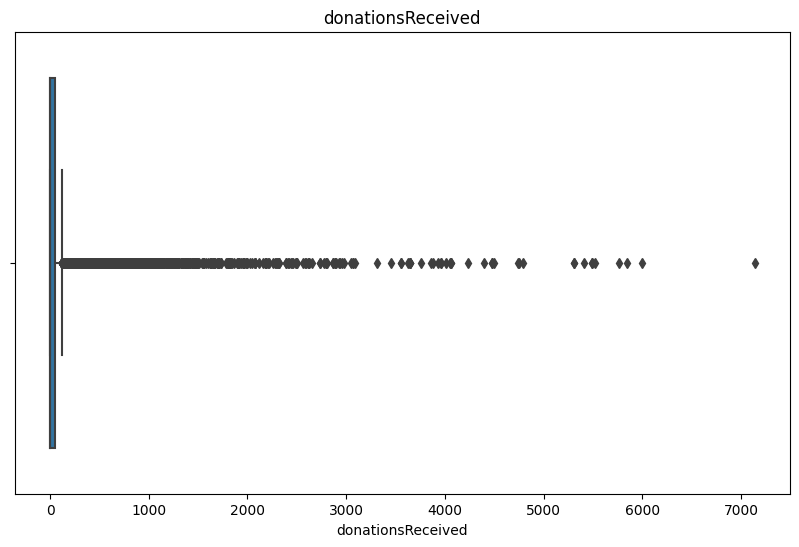

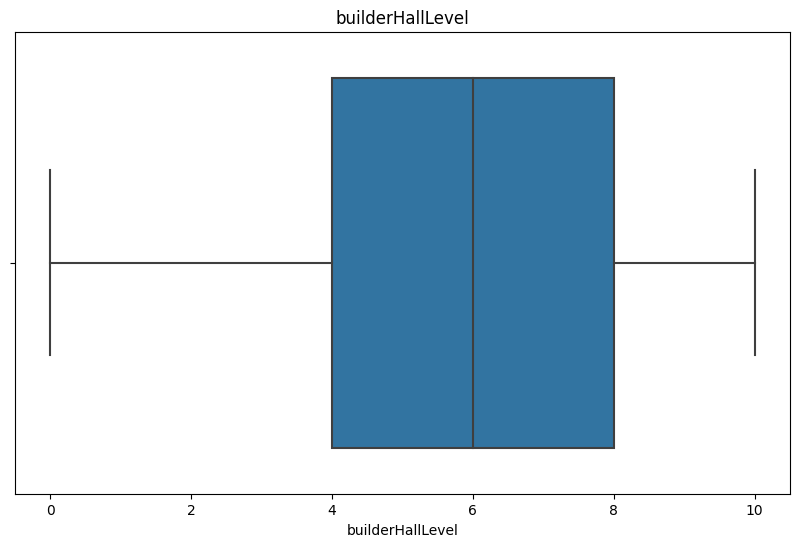

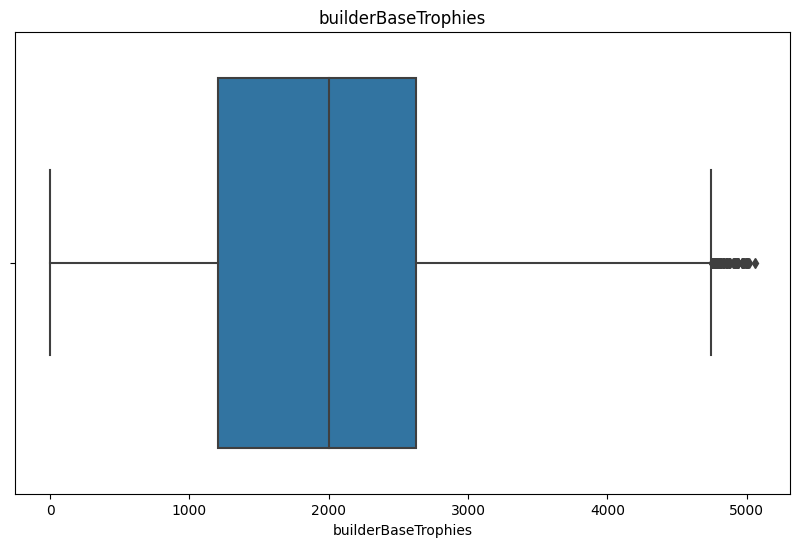

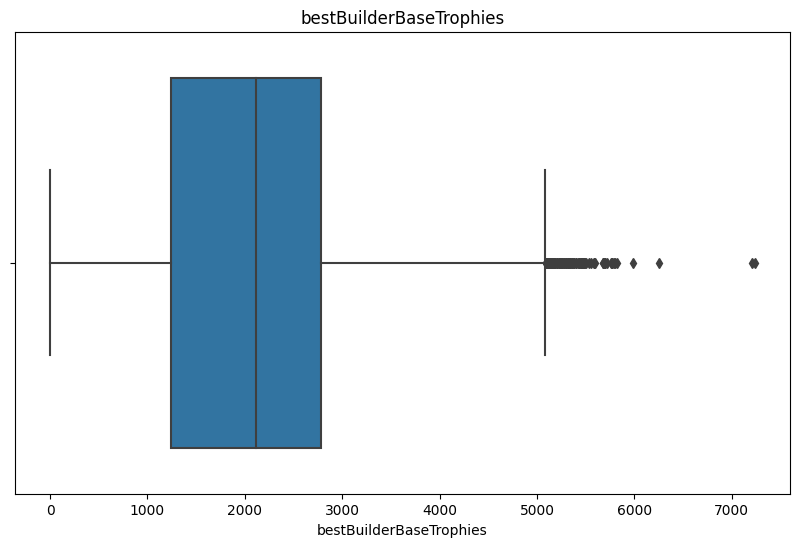

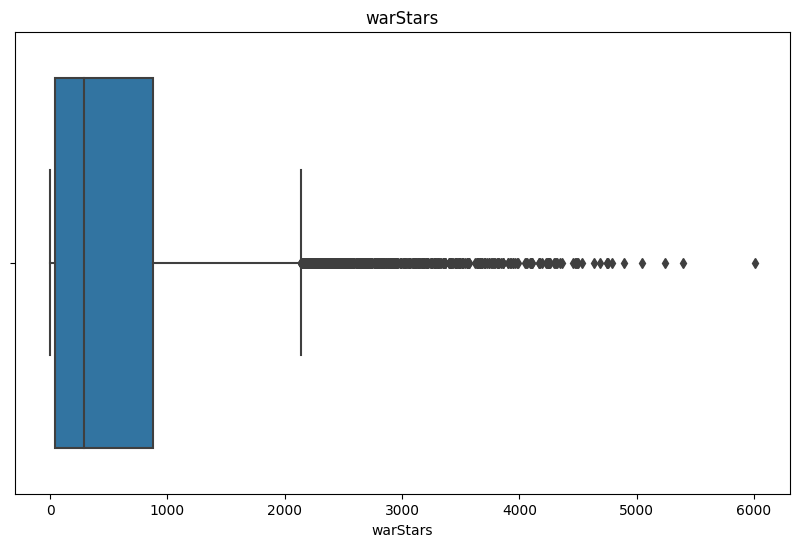

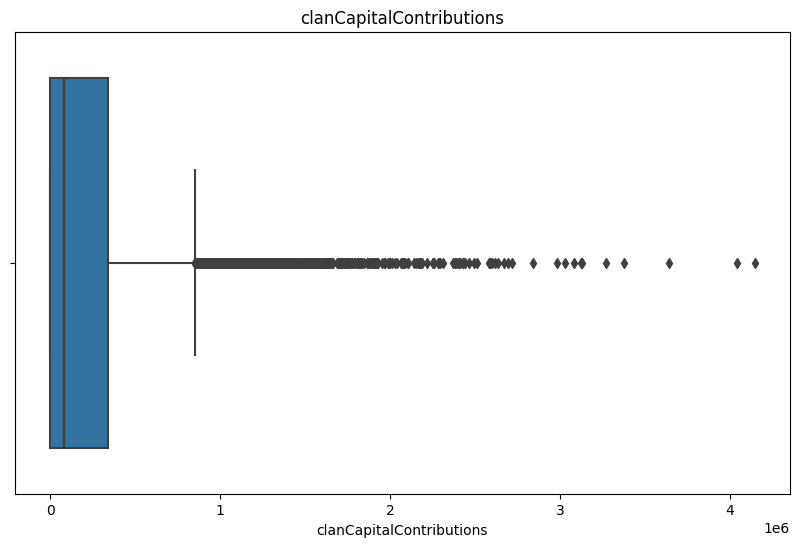

In [27]:
# Selecting numerical columns to plot
num_columns = df.select_dtypes(include=['int64']).columns
for column in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

# Bivariate Analysis

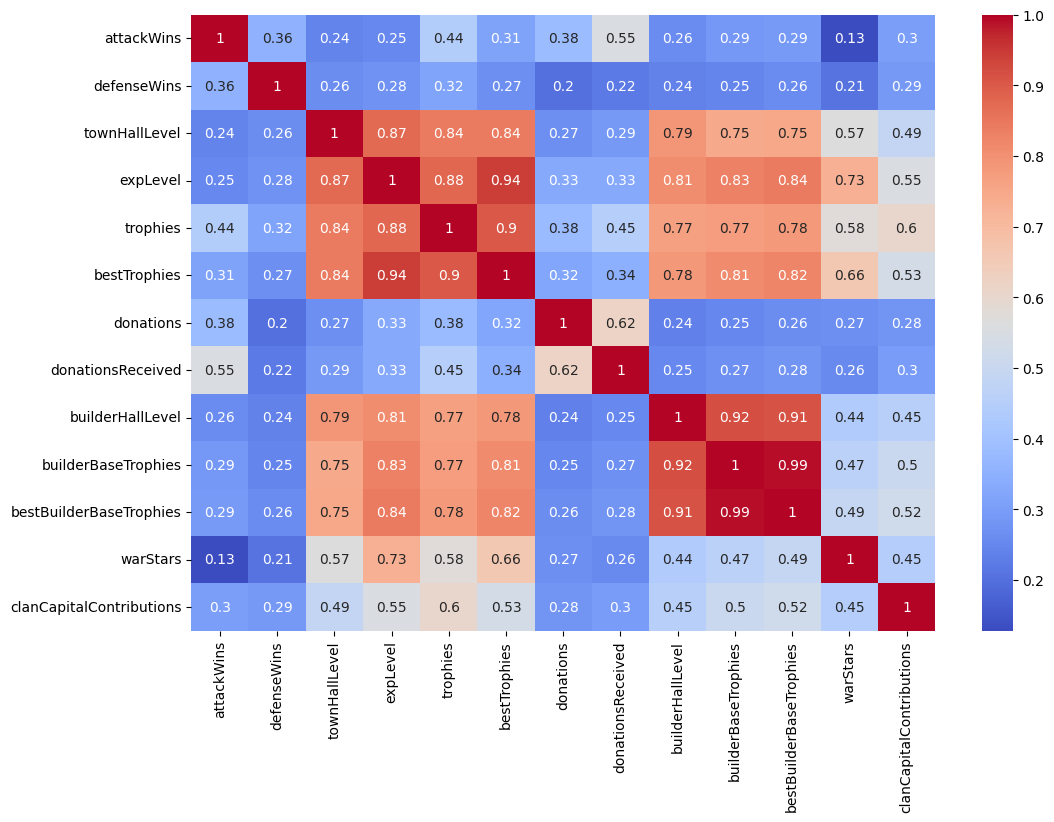

In [28]:
# Assuming df is your original DataFrame and continuous_cols contains the column names
corr_matrix = df[continuous_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

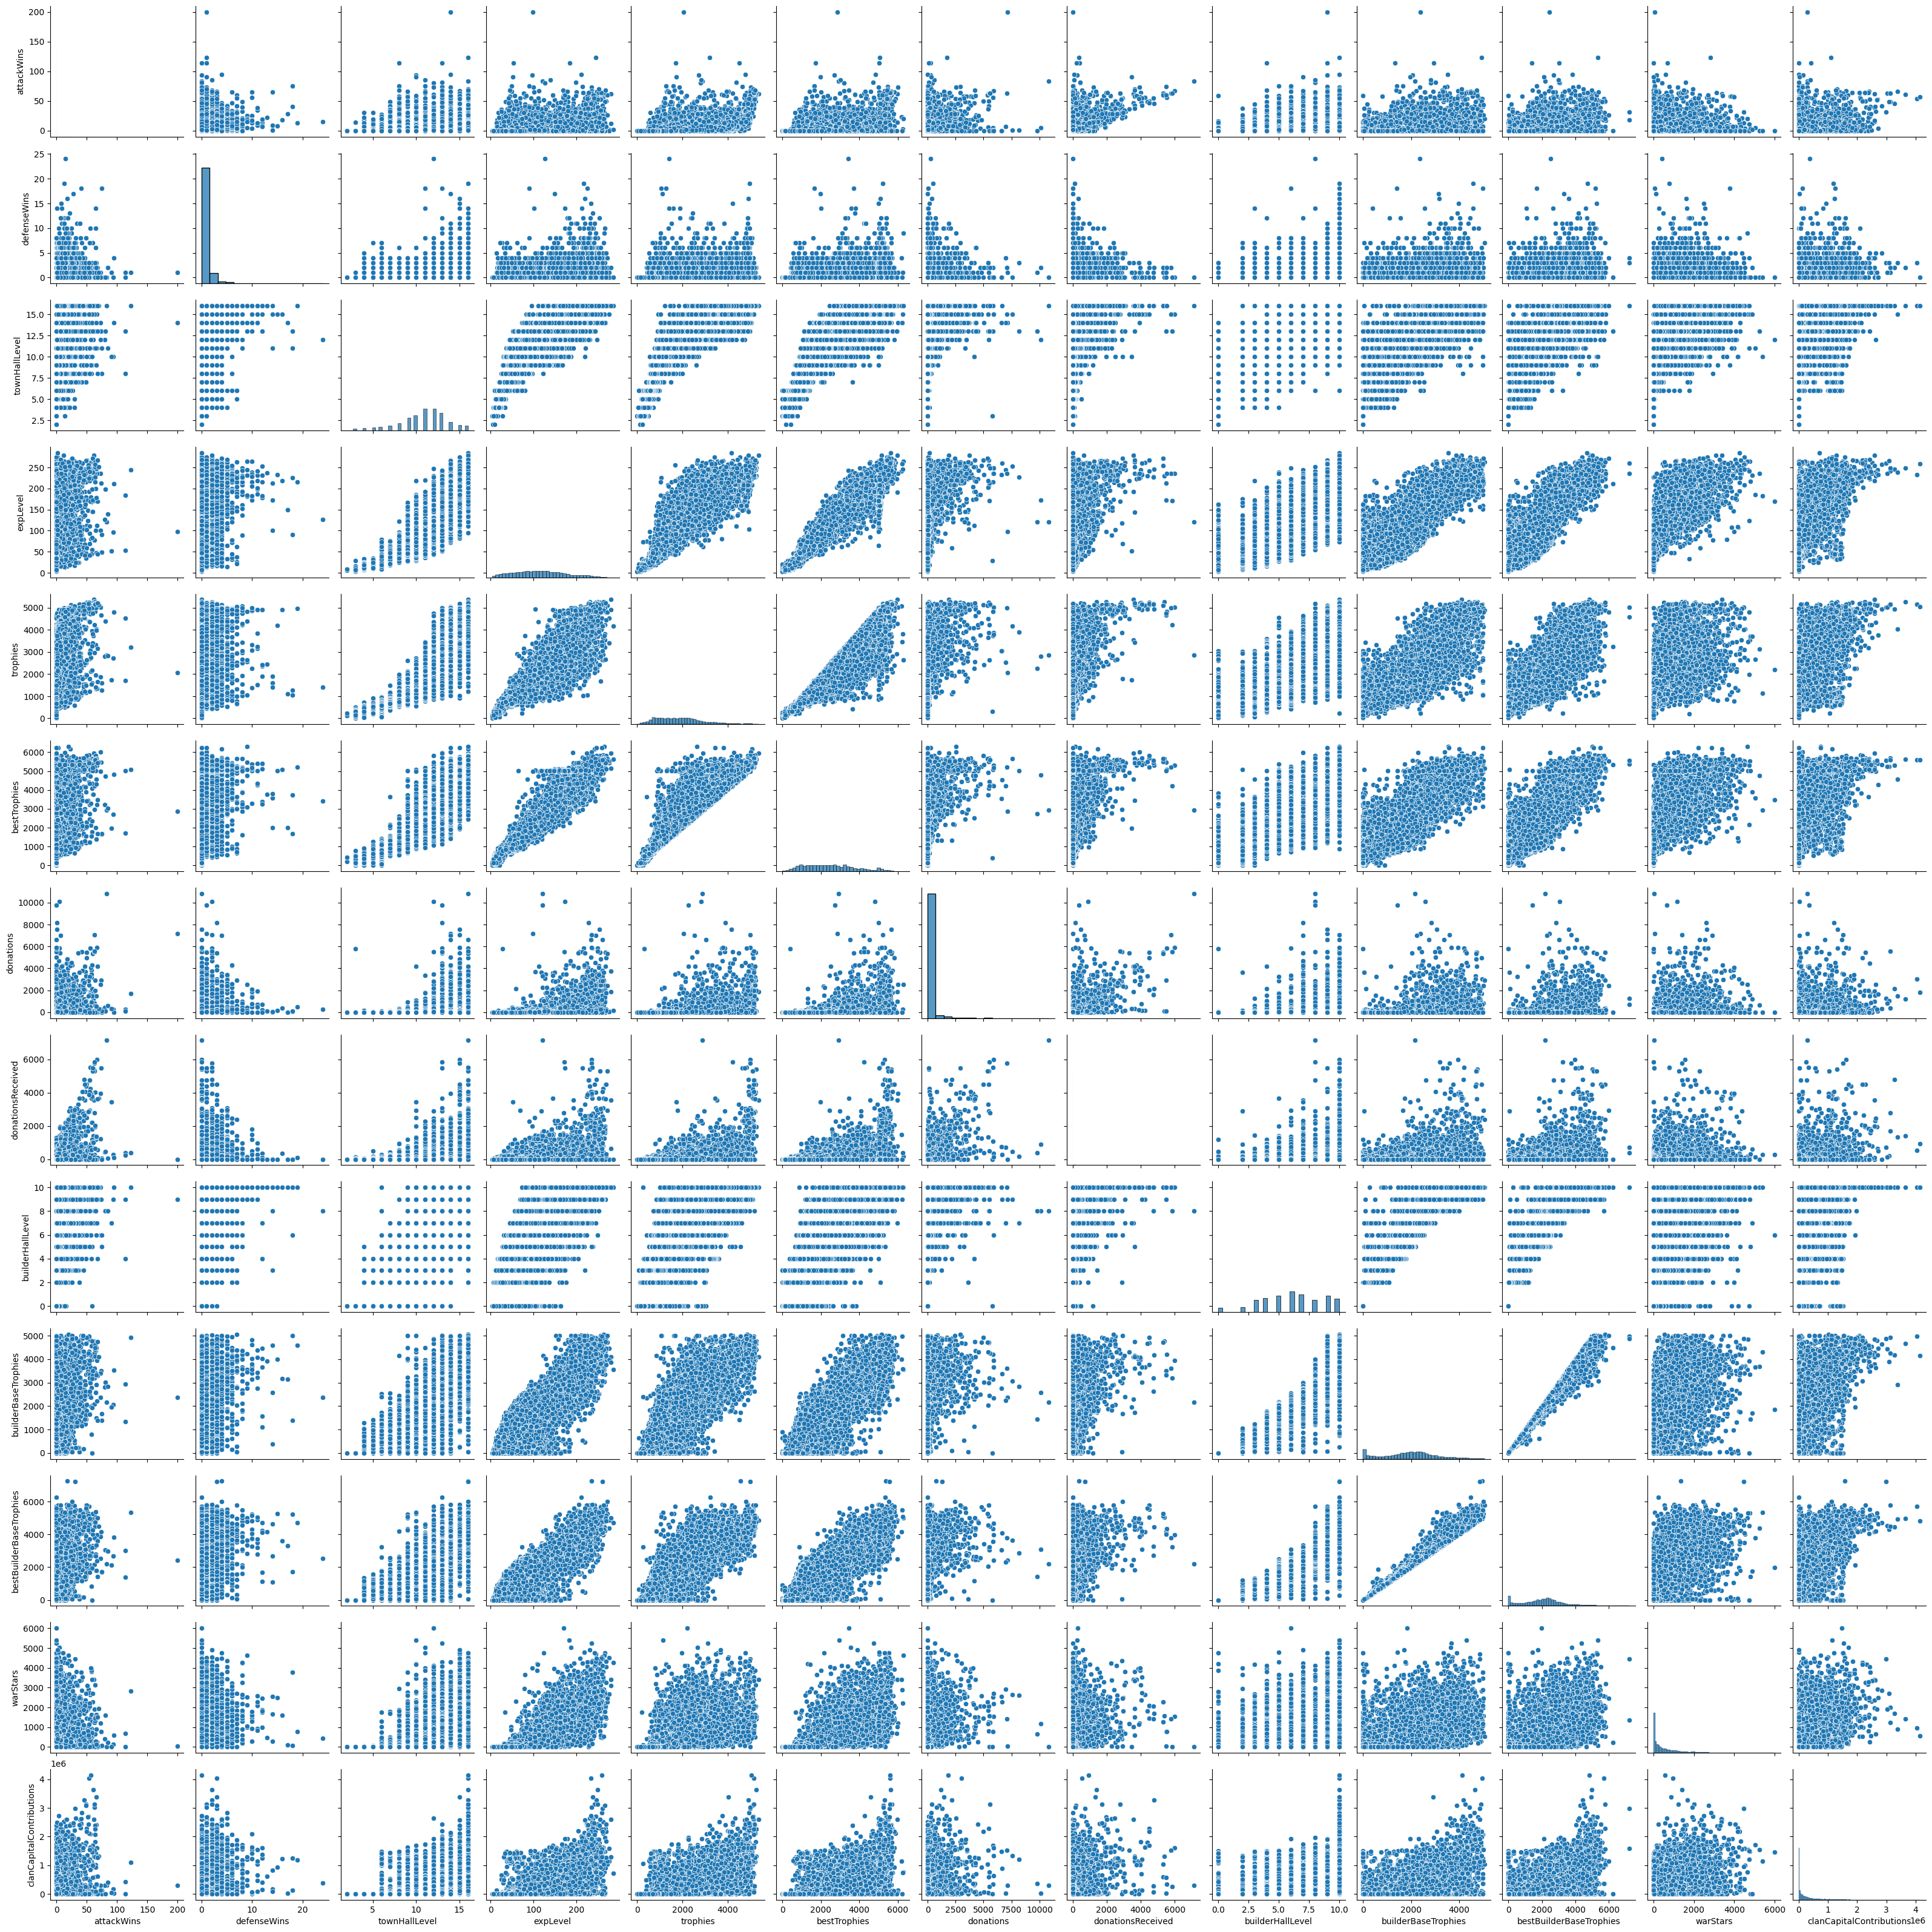

In [29]:
# Select numerical columns for the pairplot
numerical_columns = ['attackWins', 'defenseWins', 'townHallLevel', 'expLevel', 'trophies', 
                     'bestTrophies', 'donations', 'donationsReceived', 'builderHallLevel', 
                     'builderBaseTrophies', 'bestBuilderBaseTrophies', 'warStars', 'clanCapitalContributions']

# Create a pairplot
sns.pairplot(df[numerical_columns])

plt.show()

# Summary of Analysis

Approximately 62% of players are categorized as "unranked" in their leagues, suggesting a significant portion of the player base might be inactive or less engaged in loot attacks.

The distribution within the Builder Base battles indicates that the majority (the top 25%) of players who are ranked fall into the Brass League, highlighting it as the most common competitive tier among those who participate in Builder Base battles. 

The analysis of Town Hall levels reveals a left-skewed distribution. This skewness indicates that a large number of players either discontinue playing early in their progression or are relatively new to the game, not having advanced far in terms of their Town Hall level.

Conversely, the right-skewed distributions observed in Builder Hall level, war stars, and clan capital contributions suggest that only a small fraction of players achieve high levels of engagement or success. These metrics are indicative of more serious or dedicated gameplay, revealing that a minority of the player base is deeply invested in advancing their competencies and contributions within the game.

Correlation analysis among various metrics, such as Town Hall level and Experience level, Town Hall level and trophies, Experience level and trophies, Experience level and best trophies, best Builder Base trophies and Builder Base trophies, as well as best Builder Base trophies and Builder Hall level, demonstrates strong positive correlations. These relationships suggest that as players advance their Town Hall and Builder Hall levels, they tend to gain more experience, achieve higher trophy counts, and contribute more significantly to their clans, reinforcing the link between player progression and engagement metrics.

# Specific Queries

In [30]:
# Top 3 Clans with respect to townhall level 15
top_clans_th15 = df[df['townHallLevel'] == 15]['Clan Tag'].value_counts().head(3)
print(top_clans_th15)

Clan Tag
%23ULQGU8VG    18
%238LQPQGL2    12
%23UQRVYV8R    12
Name: count, dtype: int64


In [31]:
# How many players have defenseWins > attackWins
players_defense_greater_than_attack = (df['defenseWins'] > df['attackWins']).sum()
print(players_defense_greater_than_attack)

420


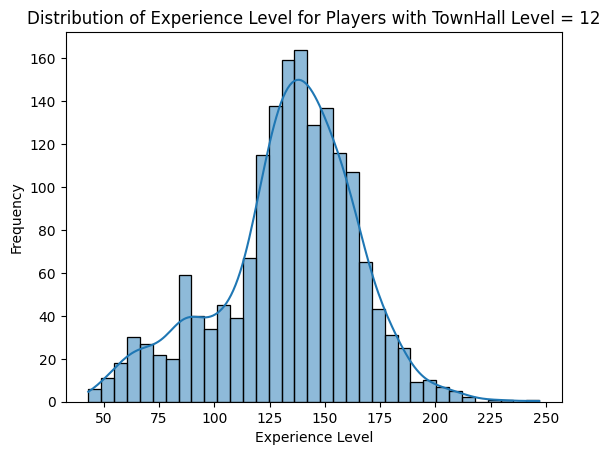

In [32]:
# Distribution of experience level of people having townhall level = 12
sns.histplot(df[df['townHallLevel'] == 12]['expLevel'], kde=True)
plt.title('Distribution of Experience Level for Players with TownHall Level = 12')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Top 5 war players with townhall level and explevel
top_war_players = df.sort_values(by='warStars', ascending=False).head(5)[['name', 'townHallLevel', 'expLevel', 'warStars']]
print(top_war_players)

              name  townHallLevel  expLevel  warStars
3515  Maquiavelico             12       170      6005
2108    chaussures             10       182      5398
2097          Cipo             13       235      5240
2098  Kamikaze-Sue             11       186      5044
6916  KING & URIEL             15       231      4893


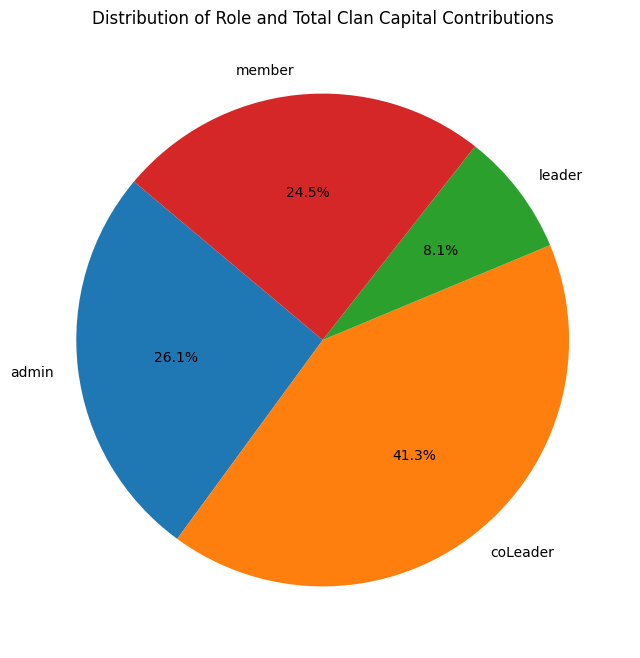

In [34]:
# Distribution of role and total clan capital contributions

# Aggregate total clan capital contributions by role
role_contributions = df.groupby('role')['clanCapitalContributions'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(role_contributions, labels=role_contributions.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Role and Total Clan Capital Contributions')
plt.show()